In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr

from discontinuum.providers import usgs

In [2]:
# configuration
# Choptank River at Greensboro, MD
# site = "01491000"
# start_date = "1979-10-01"
# end_date = "2011-09-30"
# parameter_cd = "00631" #5 digit USGS code

# SF Coeur D Alene River
site = "12413470"
# parameter_cd = "00665"
parameter_cd = "00631"
start_date = "1988-10-01"
end_date = "2021-09-30"

In [5]:
from dataretrieval import wqp

df, _ = wqp.get_results(siteid="USGS-12413470", start_date="10-01-1988")

/Users/thodson/micromamba/envs/discontinuum-dev/lib/python3.11/site-packages/dataretrieval/wqp.py:494: UserWarning: USGS discrete water quality data availability and format are changing. Beginning in March 2024 the data obtained from legacy profiles will not include new USGS data or recent updates to existing data. To view the status of changes in data availability and code functionality, visit: https://doi-usgs.github.io/dataRetrieval/articles/Status.html. If you have additional questions about these changes, email CompTools@usgs.gov.
  warnings.warn(('USGS discrete water quality data availability '


In [9]:
test = df[df["CharacteristicName"] == "Inorganic nitrogen (nitrate and nitrite)"]

In [19]:
test2 = test[test["ResultSampleFractionText"] == "Dissolved"]

In [23]:
test3 = test2["ResultMeasureValue"]

In [24]:
ds = xr.DataArray.from_series(test3)

In [27]:
any(ds.isnull())

True

In [5]:
# download data

daily = usgs.get_daily(site=site, start_date=start_date, end_date=end_date)
samples2 = usgs.get_samples(site=site, start_date=start_date, end_date=end_date, pcode=parameter_cd)

# samples = aggregate_to_daily(samples)

# training_data = xr.merge([samples, daily], join='inner')

/Users/thodson/micromamba/envs/discontinuum-dev/lib/python3.11/site-packages/dataretrieval/nwis.py:180: UserWarning: WARNING: Starting in March 2024, the NWIS qw data endpoint is retiring and no longer receives updates. For more information, refer to https://waterdata.usgs.gov.nwis/qwdata and https://doi-usgs.github.io/dataRetrieval/articles/Status.html or email CompTools@usgs.gov.
  warnings.warn(('WARNING: Starting in March 2024, the NWIS qw data endpoint is '


In [ ]:
"USGSPCode"

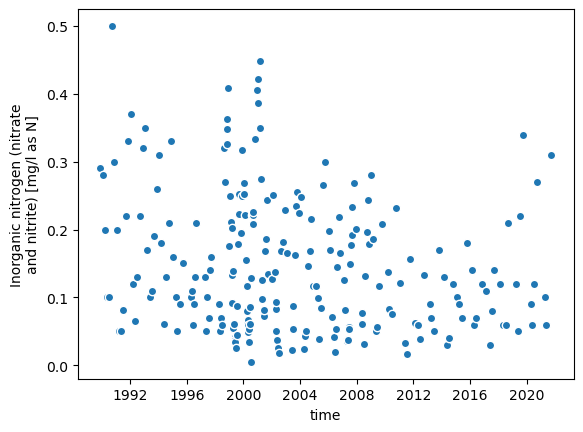

In [6]:
samples2.plot.scatter(y="concentration")

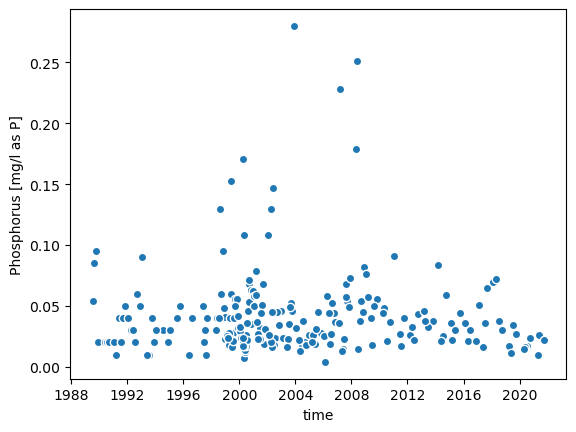

In [4]:
# fig, ax =
samples.plot.scatter(y="concentration")

In [4]:
%%time
# fit model

from discontinuum.models import WRTDSModel

model = WRTDSModel()
model.fit(target=training_data["concentration"], covariates=training_data[["time", "flow"]])

MAP ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   3% 0:01:25 logp = -194.57, ||grad|| = 0.0059985

CPU times: user 7.03 s, sys: 1.43 s, total: 8.46 s
Wall time: 7.41 s


<Axes: xlabel='time', ylabel='Inorganic nitrogen (nitrate\nand nitrite) [mg/l as N]'>

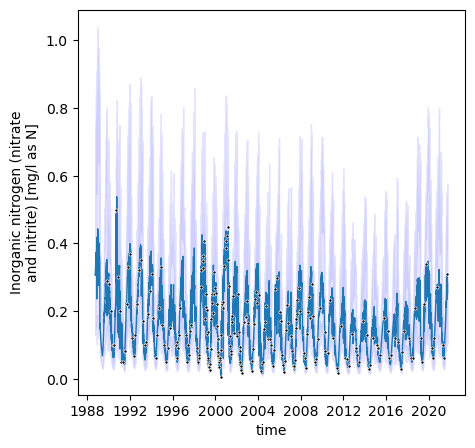

In [5]:
# plot result

model.plot_concentration(daily[["time", "flow"]])

In [6]:
from dataretrieval import wqp

In [17]:
df, _ = wqp.get_results(siteid="IL_EPA_WQX-D-32", CharacteristicName="Phosphorus", CharacteristicFraction="test")

/Users/thodson/micromamba/envs/discontinuum-dev/lib/python3.11/site-packages/dataretrieval/wqp.py:494: UserWarning: USGS discrete water quality data availability and format are changing. Beginning in March 2024 the data obtained from legacy profiles will not include new USGS data or recent updates to existing data. To view the status of changes in data availability and code functionality, visit: https://doi-usgs.github.io/dataRetrieval/articles/Status.html. If you have additional questions about these changes, email CompTools@usgs.gov.
  warnings.warn(('USGS discrete water quality data availability '


In [19]:
df["ResultSampleFractionText"] == None

0      False
1      False
2      False
3      False
4      False
       ...  
379    False
380    False
381    False
382    False
383    False
Name: ResultSampleFractionText, Length: 384, dtype: bool